## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

D:\Programs\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


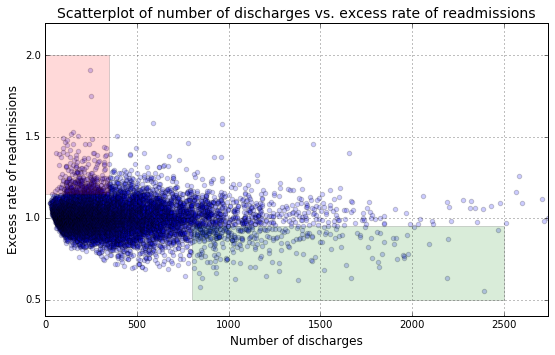

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

To see whether the analysis above is correct, it should be proven that the difference in the excess readmission ratio of hospitals with small capacity and those with large capacity is significant. 

Furthermore, it should be proven that by increasing the hospital capacity will significantly improve the excess readmission rate. 

First, whether the difference in excess readmission ratio is significant will be determined. Based from the analysis, hospitals with small capacity will be defined as those with number of discharges <100.

In [189]:
import scipy.stats

In [206]:
data = clean_hospital_read_df[81:-3]

To determine which statistical test is appropriate to use, it should first be determined whether the distribution of excess readmission ratio of hospitals is normal. 

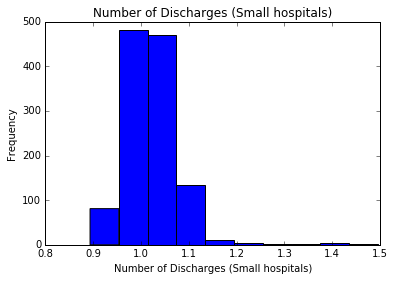

In [191]:
plt.autoscale(enable=True)
data_s = data[data['Number of Discharges']<100]['Excess Readmission Ratio']
plt.hist(data_s)
#plt.hist(data_s, bins=range(min(data_s), max(data_s) + 50, 50), range=[0,3000])
plt.title("Number of Discharges (Small hospitals)")
plt.xlabel("Number of Discharges (Small hospitals)")
plt.ylabel("Frequency")
plt.show()

In [213]:
size_s = len(data_s)
print "Total number of discharges (small hospitals): %d" % size_s

Total number of discharges (small hospitals): 1188


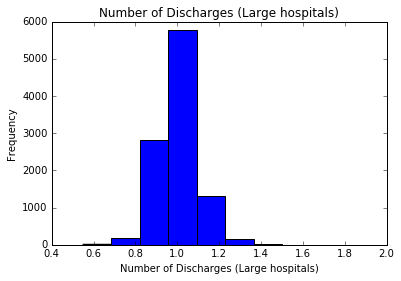

In [192]:
plt.autoscale(enable=True)
data_l = data[data['Number of Discharges']>=100]['Excess Readmission Ratio']
plt.hist(data_l)
#plt.hist(data_s, bins=range(min(data_s), max(data_s) + 50, 50), range=[0,3000])
plt.title("Number of Discharges (Large hospitals)")
plt.xlabel("Number of Discharges (Large hospitals)")
plt.ylabel("Frequency")
plt.show()

In [214]:
size_l = len(data_l)
print "Total number of discharges (large hospitals): %d" % size_l

Total number of discharges (large hospitals): 10309


Based from the histograms, the number of discharges for both small and large hospitals are approximately normal. In addition, there is a large number of samples. Therefore, the Z-test is appropriate. 

Setting up the null hypothesis and alternate hypothesis: 

$H_0$: Ms - Ml = 0

$H_1$: Ms - Ml > 0

To compute for z, first compute for the mean and variance of both distributions:

In [193]:
Ms = data_s.mean()
Vs = data_s.var()
print Ms
print Vs

1.02261835017
0.003361518433


In [194]:
Ml = data_l.mean()
Vl = data_l.var()
print Ml
print Vl

1.00576199437
0.00901569412392


In [195]:
import math

Taking the difference of the mean:

In [196]:
Mdiff = Ms - Ml
Mdiff

0.01685635579450806

Using these values in the formula, z is obtained to be:

In [197]:
z = Mdiff / math.sqrt((Vs/len(data_s) + (Vl/len(data_l))))
z

8.758342667488288

In [198]:
z

8.758342667488288

Therefore, p is:

In [199]:
import scipy
p = scipy.stats.norm.sf(abs(z))*2
p

1.981420388197713e-18

Since p is much smaller than $\alpha$, it can be assumed that the alternate hypothesis is correct. 

Therefore, it can be concluded that there is a significant difference between excess readmission ratio of small hospitals and larger hospitals.

However, whether or not the recommendations of the analysis will be effective still needs to be determined. While increasing the hospital size might decrease the rate of excess readmissions, the amount of decrease might not be very significant. 

Thus, in addition to p, the effect size can also be measured.

To compute for the effect size, first determine the distribution of both the number of discharges and excess readmission ratio:

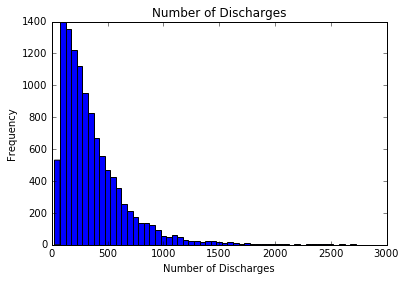

In [207]:
plt.autoscale(enable=True)
data = clean_hospital_read_df['Number of Discharges'][81:-3]
plt.hist(clean_hospital_read_df['Number of Discharges'][81:-3], bins=range(min(data), max(data) + 50, 50), range=[0,3000])
plt.title("Number of Discharges")
plt.xlabel("Number of Discharges")
plt.ylabel("Frequency")
plt.show()

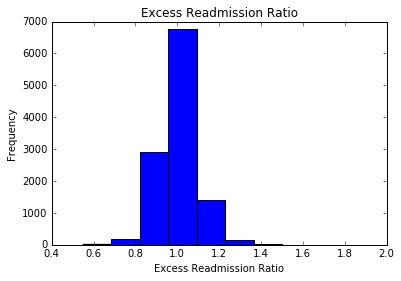

In [208]:
plt.autoscale(enable=True)
data = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
plt.hist(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
plt.title("Excess Readmission Ratio")
plt.xlabel("Excess Readmission Ratio")
plt.ylabel("Frequency")
plt.show()

Since the number of discharges and the excess readmission ratio are continuous variables and the number of discharges appears to have a non-normal distribution, then the appropriate statistical test is the Spearman correlation coefficient.  

In [209]:
discharges = clean_hospital_read_df['Number of Discharges'][81:-3]
data = clean_hospital_read_df[81:-3]

In [210]:
rho, pval = spearmanr(discharges, clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
print rho
print pval

-0.0768580372327
1.56724947919e-16


Since the computed rho is negative, then it can be said that there is a negative correlation between the number of discharges and excess readmission ratio, which is in agreement with the previous analysis.

However, since rho is close to zero, then it can be concluded that the correlation is not very strong. Increasing the hospital capacity will not produce a large difference on the excess readmission rate.  

Because the p-value computed is very small, it can be assumed that the values that were computed are significant.

From the results of the z-test and the Spearman correlation coefficient, it can be concluded that while it is true that increasing hospital capacity will decrease excess readmission rates, the improvement might not be very large. Keeping this in mind, hospitals can either follow the recommendations of the analysis, or investigate other ways to improve excess readmission rates. 